# Pymaceuticals Inc.

## Analysis
In the study there were 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. I point out three observation from our data analysis.
1. Due to duplication error, I had to drop observations for a mouse with the ID "g989".
2. The average tumor volume for the mice treated with Capomulin was 40.675g which is lower than for all but one treatment regimen. This might suggest efficacy of the drug. 
3. We observe a highly positive correaltion between weight and average tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
merge_df = pd.merge( study_results, mouse_metadata, how = 'left', on="Mouse ID")
# Display the data table for preview
#merge_df= merge_df.sort_values(by='Timepoint')
merge_df.head()
#merge_df.reset_index(drop=True).head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
total_count = len(merge_df['Mouse ID'].unique())
total_count

249

In [3]:
duplicate = merge_df[merge_df.duplicated()]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
merge_df.drop(merge_df[merge_df['Mouse ID'] == 'g989'].index, inplace = True)
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
total_count = len(merge_df['Mouse ID'].unique())
total_count

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary = merge_df[['Drug Regimen', 'Tumor Volume (mm3)'] ]
summary.head()
A = pd.DataFrame(summary.groupby('Drug Regimen').mean())
A.columns = ['Mean Tumor Volume']
B = pd.DataFrame(summary.groupby('Drug Regimen').median())
B.columns = ['Median Tumor Volume']
C = pd.DataFrame(summary.groupby('Drug Regimen').var())
C.columns = ['Tumor Volume Variance']
D = pd.DataFrame(summary.groupby('Drug Regimen').std())
D.columns = ['Tumor Volume Std. Dev.']
E = pd.DataFrame(summary.groupby('Drug Regimen').sem())
E.columns = ['Tumor Volume Std. Err.']

mergedDf = A.merge(B, left_index=True, right_index=True)
mergedDf = mergedDf.merge(C, left_index=True, right_index=True)
mergedDf = mergedDf.merge(D, left_index=True, right_index=True)
summary_stat = mergedDf.merge(E, left_index=True, right_index=True)
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics = summary.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

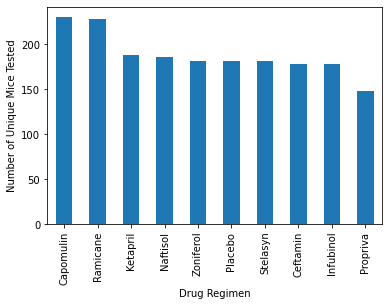

In [8]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
bar_df = pd.DataFrame(merge_df.groupby('Drug Regimen')['Mouse ID'].count())
bar_df = bar_df.sort_values(by = 'Mouse ID',  ascending= False)
bar_df.plot.bar(rot='vertical',legend=False, xlabel='Drug Regimen', ylabel='Number of Unique Mice Tested')
plt.show()

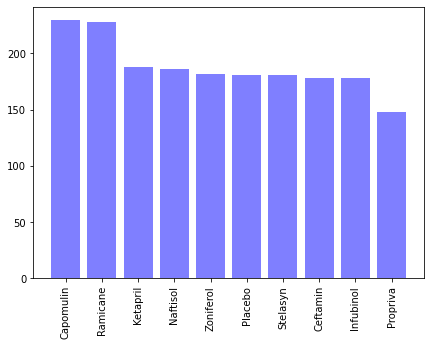

In [9]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
count = bar_df['Mouse ID']
x_axis = np.arange(len(count))
plt.figure(figsize=(7,5))
plt.bar(x_axis, count, color='b', alpha=0.5, align="center")
plt.xticks(range(len(bar_df.index)), bar_df.index, rotation="vertical")
plt.show()

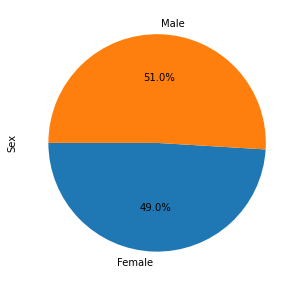

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(merge_df.groupby('Sex')['Mouse ID'].count())
gender_df = gender_df.sort_values(by = 'Mouse ID',  ascending= True)
gender_df.plot.pie(y = 'Mouse ID', label = 'Sex', legend=False, figsize = (5,5),autopct="%1.1f%%",startangle=180)
plt.show()

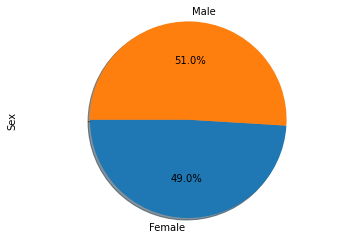

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df['Mouse ID'], labels = gender_df.index, autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = merge_df[['Mouse ID', 'Timepoint']]
timepoint_max = timepoint_df.groupby('Mouse ID').agg({'Timepoint': 'max'})
timepoint_max.columns = ['Max Timepoint']
timepoint_max

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_merged = timepoint_max.merge(merge_df, how='outer', left_index=True, right_on = 'Mouse ID')
timepoint_merged = timepoint_merged.sort_values('Mouse ID')
timepoint_merged_regimen = timepoint_merged.loc[(timepoint_merged["Drug Regimen"] == "Capomulin") | 
                                                (timepoint_merged["Drug Regimen"] == "Ramicane") |
                                                (timepoint_merged["Drug Regimen"] == "Infubinol") |
                                                (timepoint_merged["Drug Regimen"] == "Ceftamin")]

timepoint_merged_regimen = timepoint_merged_regimen.loc[(timepoint_merged["Max Timepoint"] == timepoint_merged["Timepoint"]) ]
timepoint_merged_regimen.df = timepoint_merged_regimen[['Mouse ID', 'Max Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen' ]]
timepoint_merged_regimen.df.columns = ['Mouse ID','Last Timepoint', 'Tumor Volume', 'Drug Regimen']
timepoint_merged_regimen.df = timepoint_merged_regimen.df.reset_index(drop=True)
timepoint_merged_regimen.df

<ipython-input-12-5518b7328a30>:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  timepoint_merged_regimen.df = timepoint_merged_regimen[['Mouse ID', 'Max Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen' ]]


,Mouse ID,Last Timepoint,Tumor Volume,Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin","Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    tumor_vol_list = []
    # Locate the rows which contain mice on each drug and get the tumor volumes
    new_frame = timepoint_merged_regimen.df.loc[timepoint_merged_regimen.df["Drug Regimen"] == drug]
    # add subset 
    tumor_vol_list = new_frame['Tumor Volume']
    quartiles = tumor_vol_list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    outliers = [x for x in tumor_vol_list if x < lower_bound or x > upper_bound ]
    print(f" For {drug} the outlier values are {outliers}.")
    drug
    

 For Capomulin the outlier values are [].
 For Ramicane the outlier values are [].
 For Infubinol the outlier values are [36.321345799999996].
 For Ceftamin the outlier values are [].


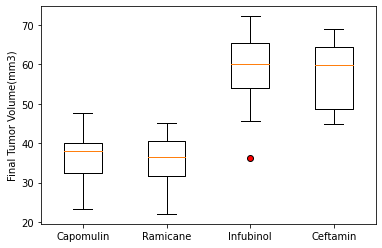

In [14]:
 # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin_frame = timepoint_merged_regimen.df.loc[timepoint_merged_regimen.df["Drug Regimen"] == "Capomulin"]
data_1= Capomulin_frame['Tumor Volume']
Ramicane_frame = timepoint_merged_regimen.df.loc[timepoint_merged_regimen.df["Drug Regimen"] == "Ramicane"]
data_2= Ramicane_frame['Tumor Volume']
Infubinol_frame = timepoint_merged_regimen.df.loc[timepoint_merged_regimen.df["Drug Regimen"] == "Infubinol"]
data_3= Infubinol_frame['Tumor Volume']
Ceftamin_frame = timepoint_merged_regimen.df.loc[timepoint_merged_regimen.df["Drug Regimen"] == "Ceftamin"]
data_4= Ceftamin_frame['Tumor Volume']


fig1, ax1 = plt.subplots()
red_circle = dict(markerfacecolor ='r', marker='o')
ax1.set_ylabel('Final Tumor Volume(mm3)')
plt.boxplot ([data_1, data_2, data_3, data_4], flierprops=red_circle)
plt.xticks([1, 2, 3, 4], ["Capomulin","Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

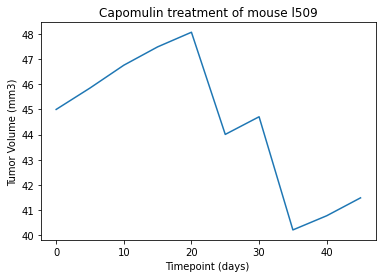

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509_frame = merge_df.loc[merge_df["Mouse ID"] == "l509"]
plt.plot(l509_frame['Timepoint'],l509_frame['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days) ")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

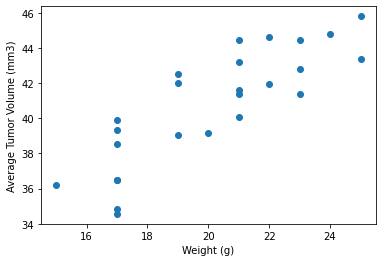

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin" ]
capomulin_data = capomulin_data[['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)', 'Timepoint']]
capomulin_data = capomulin_data.sort_values('Mouse ID')
new_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean'})
weight_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean'})
scatter_data = pd.merge(weight_data, new_data, on = "Mouse ID")
scatter_data = scatter_data.reset_index(drop = False)
plt.scatter(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


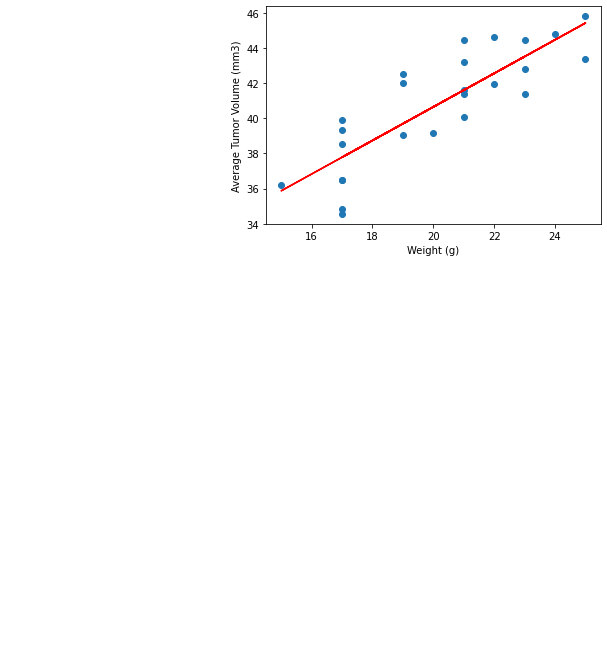

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
x_values = scatter_data['Weight (g)']
y_values = scatter_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()